# Movie Rating Data Analysis 
### Part 2: Machine Learning Methods
In this second half, we first imputed the missing values in the data set and built supervised learning models such as linear regression, logistic regression and applied regularization methods such as Ridge and Lasso.

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro

In [2]:
# Load data
movies_all = pd.read_csv('movieReplicationSet.csv')
movies_all.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


### 1) Ratings Data Handeling 
Impute missing values with average of row and column mean ratings

In [3]:
# movie ratings subset
movies = movies_all.iloc[:,:400]
movies

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,0.5,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,3.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.5,NaN,3.0,NaN,NaN,NaN,NaN,1.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,4.0,NaN,4.0,3.5,3.5,4.0,3.5,4.0,4.0,4.0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN,NaN


In [4]:
# check for nulls in the df
print('# NaN:', movies.isna().sum().sum())

# dimension of df
print('shape:', movies.shape)

# NaN: 326586
shape: (1097, 400)


In [5]:
# calculate mean for each row
r_mean = movies.mean(axis = 1)
print(r_mean.shape)
print('# NaN:', r_mean.isna().sum())

# investigate the remaining NaN
print('\n', r_mean[pd.isnull(r_mean)])
movies.iloc[896,:]
# because the user did not rate any film, we will use the 100% of the column average to impute the missing ratings

(1097,)
# NaN: 1

 896   NaN
dtype: float64


The Life of David Gale (2003)               NaN
Wing Commander (1999)                       NaN
Django Unchained (2012)                     NaN
Alien (1979)                                NaN
Indiana Jones and the Last Crusade (1989)   NaN
                                             ..
Patton (1970)                               NaN
Anaconda (1997)                             NaN
Twister (1996)                              NaN
MacArthur (1977)                            NaN
Look Who's Talking (1989)                   NaN
Name: 896, Length: 400, dtype: float64

In [6]:
# duplicate the column of row means n times to match the shape of the original df
df_r_mean = pd.concat([r_mean]*movies.shape[1], axis = 1)
print(df_r_mean.shape)
print('# NaN:', df_r_mean.isna().sum().sum())

# reset columns name to movie names
df_r_mean.columns = movies.columns

(1097, 400)
# NaN: 400


In [7]:
# calculate mean for each column
c_mean = movies.mean(axis = 0)
print(c_mean.shape)
print('# NaN:', c_mean.isna().sum())

# duplicate the row of column means n times to match the shape of the original df
df_c_mean = pd.concat([c_mean]*movies.shape[0], axis = 1).T # adjust the dimension of the array
print(df_c_mean.shape)
print('# NaN:', df_c_mean.isna().sum().sum())

(400,)
# NaN: 0
(1097, 400)
# NaN: 0


In [8]:
# calculate the average of row mean and column man for each cell
imput_df = (df_r_mean + df_c_mean)/2
print(imput_df.shape)
print('# NaN:', imput_df.isna().sum().sum())

# fill row 896 with column means
imput_df.fillna(df_c_mean, inplace = True)
print(imput_df.shape)
print('# NaN:', imput_df.isna().sum().sum())

(1097, 400)
# NaN: 400
(1097, 400)
# NaN: 0


In [9]:
# fill missing values of movies ratings with imputation df
movies.fillna(imput_df, inplace = True)

# check for nulls again
print('# NaN:', movies.isna().sum().sum())
print('shape:', movies.shape)

# NaN: 0
shape: (1097, 400)


### 2) Simple Linear Regression
I built 399 linear regression models for each of 400 movies, recording the coefficient of determination ($R^2$) and predictor movie for the highest $R^2$ value. I then calculated the mean of the $R^2$ values and plotted a histogram. Finally, I made a table of the 10 movies with the highest and lowest recorded $R^2$ values, along with their predictor movie and $R^2$ value.

In [10]:
# try one simple linear regression with the 'The Life of David Gale (2003)'
# copy the mocvies df
df = movies.copy()
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,2.828460,2.921947,2.650951,4.000000,0.500000,2.510773,2.519156,2.572578,2.428806,2.540410
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,2.820668,2.914154,2.643159,2.673112,4.000000,2.502981,2.511364,2.564786,2.421013,2.532618
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,3.114439,3.207926,2.936930,2.966883,3.500000,2.796752,2.805135,2.858557,2.714784,2.826389
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,2.664348,3.000000,2.486840,2.516793,2.500000,2.346661,2.355044,2.408466,2.264694,2.376299
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.500000,2.683993,3.000000,2.442950,2.769704,2.272819,2.281202,1.500000,2.190852,2.302456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,3.057031,3.150518,2.879523,2.909476,4.000000,2.739344,2.747727,2.801149,2.657377,2.768981
1093,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,4.000000,3.387353,4.000000,3.500000,3.500000,4.000000,3.500000,4.000000,4.000000,4.000000
1094,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,3.023296,3.116783,2.845788,2.875741,4.000000,2.705609,2.713992,2.767414,2.623642,2.735247
1095,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,3.152344,3.245831,2.974835,3.004788,2.500000,2.834657,2.843040,2.896462,2.752690,2.864294


In [11]:
# holder dict
r2_dict = {}

# iterate over each of the 400 mvoies
for title, ratings in df.iteritems():
    
    # initiate holders for best predictor
    best_x = ''
    best_r2 = 0
    
    # set y 
    y = ratings
    
    # set xiand iterate over each xi
    for col, val in df.drop(columns=[title]).iteritems():
        x = val
        
        # build slm
        reg = LinearRegression().fit(x.values.reshape(-1,1), y.values)
        #calculate r2
        r2 = reg.score(x.values.reshape(-1,1), y.values)
        
        # update best r2
        if (r2>best_r2):
            best_r2 = r2
            best_x = col
    
    # append best predictor to output dict
    r2_dict[title] = [best_x ,best_r2]
            

In [12]:
# convert r2 dict to df
q1_df = pd.DataFrame(r2_dict).T
# set index and column of the df
q1_df.reset_index(inplace = True)
q1_df.columns = ['movie (y)', 'best predictor (x)', 'COD (r2)']

q1_df

,movie (y),best predictor (x),COD (r2)
0,The Life of David Gale (2003),The King of Marvin Gardens (1972),0.567937
1,Wing Commander (1999),From Hell (2001),0.561052
2,Django Unchained (2012),The Life of David Gale (2003),0.232041
3,Alien (1979),Aliens (1986),0.329566
4,Indiana Jones and the Last Crusade (1989),Indiana Jones and the Temple of Doom (1984),0.374484
...,...,...,...
395,Patton (1970),The Lookout (2007),0.713793
396,Anaconda (1997),The Lookout (2007),0.347016
397,Twister (1996),Sexy Beast (2000),0.419015
398,MacArthur (1977),Miller's Crossing (1990),0.624702


In [13]:
# report the average COD of those 400 simple linear regression models
print('The average COD is: ', q1_df['COD (r2)'].mean())

The average COD is:  0.4237994048248018


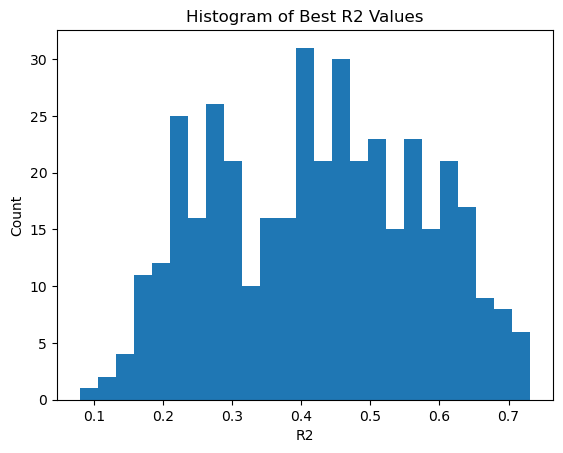

In [14]:
# histogram of these 400 COD values
q1_df['COD (r2)'].plot(kind = 'hist', bins = 25)
plt.xlabel('R2')
plt.ylabel('Count')
plt.title('Histogram of Best R2 Values');

In [15]:
# test for normality of R2
stat, p = shapiro(q1_df['COD (r2)'])
p < 0.005

True

The histogram also seems to show that the 400 $R^2$ values are normally distributed.

In [16]:
# 10 movies that are most easily predicted
q1_df.sort_values(by=['COD (r2)'], ascending=False).head(10)

,movie (y),best predictor (x),COD (r2)
203,Erik the Viking (1989),I.Q. (1994),0.731789
208,I.Q. (1994),Erik the Viking (1989),0.731789
377,The Lookout (2007),Patton (1970),0.713793
395,Patton (1970),The Lookout (2007),0.713793
240,The Bandit (1996),Best Laid Plans (1999),0.71154
249,Best Laid Plans (1999),The Bandit (1996),0.71154
282,Congo (1995),The Straight Story (1999),0.700822
287,The Straight Story (1999),Congo (1995),0.700822
334,The Final Conflict (1981),The Lookout (2007),0.700437
309,Heavy Traffic (1973),Ran (1985),0.692863


In [17]:
# 10 movies that are hardest to predict
q1_df.sort_values(by=['COD (r2)']).head(10)

,movie (y),best predictor (x),COD (r2)
80,Avatar (2009),Bad Boys (1995),0.079484
95,Interstellar (2014),Torque (2004),0.111184
9,Black Swan (2010),Sorority Boys (2002),0.11697
55,Clueless (1995),Escape from LA (1996),0.141324
190,The Cabin in the Woods (2012),The Evil Dead (1981),0.143925
319,La La Land (2016),The Lookout (2007),0.148358
292,Titanic (1997),Cocktail (1988),0.15392
41,13 Going on 30 (2004),Can't Hardly Wait (1998),0.160118
14,The Fast and the Furious (2001),Terminator 3: Rise of the Machines (2003),0.169
248,Grown Ups 2 (2013),The Core (2003),0.171151


In [18]:
# combine bottom 10 and top 10 into 1 df
df2 = pd.concat([q1_df.sort_values(by=['COD (r2)']).head(10), 
                 q1_df.sort_values(by=['COD (r2)'], ascending=False).head(10)])
# convert COD column to numeric
df2 = df2.apply(pd.to_numeric, errors = 'ignore')
# add label and set to category
df2['type'] = np.where(df2['COD (r2)'] < 0.5, 'hardest 10', 'easiset 10')
df2['type'] = df2['type'].astype('category')
# rename columns
df2.rename(columns={"COD (r2)": "slm COD (r2)"}, inplace=True)
df2

,movie (y),best predictor (x),slm COD (r2),type
80,Avatar (2009),Bad Boys (1995),0.079484,hardest 10
95,Interstellar (2014),Torque (2004),0.111184,hardest 10
9,Black Swan (2010),Sorority Boys (2002),0.116970,hardest 10
55,Clueless (1995),Escape from LA (1996),0.141324,hardest 10
190,The Cabin in the Woods (2012),The Evil Dead (1981),0.143925,hardest 10
319,La La Land (2016),The Lookout (2007),0.148358,hardest 10
292,Titanic (1997),Cocktail (1988),0.153920,hardest 10
41,13 Going on 30 (2004),Can't Hardly Wait (1998),0.160118,hardest 10
14,The Fast and the Furious (2001),Terminator 3: Rise of the Machines (2003),0.169000,hardest 10
248,Grown Ups 2 (2013),The Core (2003),0.171151,hardest 10


Given the output, the predictability of movie ratings from the ratings of a single other movie varies
significantly. The best models explain more than 70% of the data and the worst models only explain less than 10% of the data.

### 3) Multiple Linear Regression
I built multiple linear regression models for each of the 10 best and worse movies using the original best simple linear predictor and 3 additional predictors, recording the new model's $R^2$ value and calculating the change in $R^2$ for each movie. Then, I plotted a scatter plot with the $R^2$ values of the simple linear models on the x-axis and $R^2$ values of the multiple linear models on the y-axis.

In [19]:
# seperate y 
df2_y = movies[df2['movie (y)']]
print(df2_y.shape)

# seperate x
df2_x = movies[df2['best predictor (x)']]
add_x = movies_all.iloc[:,474:]
df2_x = pd.concat([df2_x, add_x], axis = 1)
print(df2_x.shape)

(1097, 20)
(1097, 23)


In [20]:
# check missing values
df2_x.isnull().sum()

Bad Boys (1995)                                                        0
Torque (2004)                                                          0
Sorority Boys (2002)                                                   0
Escape from LA (1996)                                                  0
The Evil Dead (1981)                                                   0
The Lookout (2007)                                                     0
Cocktail (1988)                                                        0
Can't Hardly Wait (1998)                                               0
Terminator 3: Rise of the Machines (2003)                              0
The Core (2003)                                                        0
I.Q. (1994)                                                            0
Erik the Viking (1989)                                                 0
Patton (1970)                                                          0
The Lookout (2007)                                 

In [21]:
# assign -1 to missing genders
df2_x.fillna(-1, inplace = True)

# check again
print(df2_x['Gender identity (1 = female; 2 = male; 3 = self-described)'].unique())
print('# NaN: ', df2_x.isnull().sum().sum())

# rename columns
df2_x.rename(columns={"Gender identity (1 = female; 2 = male; 3 = self-described)": "gender", 
                      "Are you an only child? (1: Yes; 0: No; -1: Did not respond)": "sibship", 
                      "Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)": "social pref"},
             inplace=True)
print(df2_x.columns)

[ 1.  2. -1.  3.]
# NaN:  0
Index(['Bad Boys (1995)', 'Torque (2004)', 'Sorority Boys (2002)',
       'Escape from LA (1996)', 'The Evil Dead (1981)', 'The Lookout (2007)',
       'Cocktail (1988)', 'Can't Hardly Wait (1998)',
       'Terminator 3: Rise of the Machines (2003)', 'The Core (2003)',
       'I.Q. (1994)', 'Erik the Viking (1989)', 'Patton (1970)',
       'The Lookout (2007)', 'Best Laid Plans (1999)', 'The Bandit (1996)',
       'The Straight Story (1999)', 'Congo (1995)', 'The Lookout (2007)',
       'Ran (1985)', 'gender', 'sibship', 'social pref'],
      dtype='object')


In [22]:
# check multicolinearity for the last 3 columns
# add constant to features
vif_x = df2_x[['gender', 'sibship', 'social pref']]
vif_x['constant'] = 1
# vif df
vif = pd.DataFrame()
vif["feature"] = vif_x.columns
# calculate vif
vif["vif"] = [variance_inflation_factor(vif_x.values, i) for i in range(len(vif_x.columns))]
vif

C:\Users\liuq34\AppData\Local\Temp\ipykernel_27460\897342967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vif_x['constant'] = 1


,feature,vif
0,gender,1.078013
1,sibship,1.074705
2,social pref,1.058126
3,constant,6.158223


low VIF scores indicating multicollinearity is not an issue.

In [23]:
# initiate container for multiple linear regression model r2
mlm_r2 = np.empty(20)

# iterate over each of the 20 mvoies
for i in range(20):
    # set y and x
    y = df2_y.iloc[:,i]
    x = df2_x.iloc[:,[i, 20, 21, 22]]
    
    # build mlm
    reg = LinearRegression().fit(x.values, y.values)
    r2 = reg.score(x.values, y.values)
    
    # append caculated r_2
    mlm_r2[i] = r2
mlm_r2

array([0.08179049, 0.11546833, 0.11805013, 0.14501357, 0.15035782,
       0.15094305, 0.15642698, 0.16268066, 0.17193976, 0.1766405 ,
       0.73256113, 0.73215278, 0.71528041, 0.71492421, 0.71205245,
       0.71254722, 0.70091648, 0.70119282, 0.70234356, 0.69301528])

In [24]:
# append new r_2 top df
df2['mlm COD (r2)'] = mlm_r2
df2

,movie (y),best predictor (x),slm COD (r2),type,mlm COD (r2)
80,Avatar (2009),Bad Boys (1995),0.079484,hardest 10,0.081790
95,Interstellar (2014),Torque (2004),0.111184,hardest 10,0.115468
9,Black Swan (2010),Sorority Boys (2002),0.116970,hardest 10,0.118050
55,Clueless (1995),Escape from LA (1996),0.141324,hardest 10,0.145014
190,The Cabin in the Woods (2012),The Evil Dead (1981),0.143925,hardest 10,0.150358
319,La La Land (2016),The Lookout (2007),0.148358,hardest 10,0.150943
292,Titanic (1997),Cocktail (1988),0.153920,hardest 10,0.156427
41,13 Going on 30 (2004),Can't Hardly Wait (1998),0.160118,hardest 10,0.162681
14,The Fast and the Furious (2001),Terminator 3: Rise of the Machines (2003),0.169000,hardest 10,0.171940
248,Grown Ups 2 (2013),The Core (2003),0.171151,hardest 10,0.176640


In [25]:
# look at change
df2['change'] = df2['mlm COD (r2)'] - df2['slm COD (r2)']
df2['change'].describe()

count    20.000000
mean      0.002084
std       0.001786
min       0.000094
25%       0.000707
50%       0.001697
75%       0.002674
max       0.006433
Name: change, dtype: float64

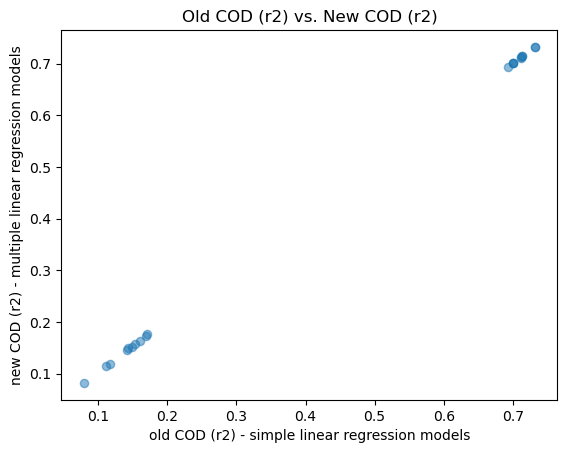

In [26]:
# scatterplot where the old COD (for the simple linear regression models from the previous question) 
# is on the x-axis and the new R^2 (for the new multiple regression models) is on the y-axis
plt.scatter(df2['slm COD (r2)'], df2['mlm COD (r2)'], s = 35, alpha = 0.5)
plt.title("Old COD (r2) vs. New COD (r2)")
plt.xlabel("old COD (r2) - simple linear regression models")
plt.ylabel("new COD (r2) - multiple linear regression models");

All the COD ($R^2$) values of the 20 movies have increased, but improvements are only by a bit.

### 4) Ridge Regression
I selected 30 movies as targets and randomly selected 10 other movies as predictors. After doing an 80/20 train/test split of the columns, I built ridge regression models using the training data. Next, I used grid searches to find the best alpha by minimizing RMSE, then trained the model using the optimal alpha. Finally, I calculated predicted values and RMSE for the 30 movies using the test data.

In [27]:
# order the result df from part 1) and pick 30 in the middlle
q1_df_sort = q1_df.sort_values(by = 'COD (r2)').reset_index()
middle_30 = q1_df_sort['movie (y)'][185:215]
middle_30

# select the 30 movies fomr movies df
df3_y = movies[middle_30]
df3_y.columns

Index(['Gone in Sixty Seconds (2000)', 'Crossroads (2002)',
       'Austin Powers: The Spy Who Shagged Me (1999)',
       'Austin Powers in Goldmember (2002)', 'Goodfellas (1990)',
       'The Big Lebowski (1998)', 'Twister (1996)',
       'Blues Brothers 2000 (1998)', 'Dances with Wolves (1990)',
       '28 Days Later (2002)', 'Knight and Day (2010)', 'The Evil Dead (1981)',
       'The Machinist (2004)', 'Uptown Girls (2003)', 'The Blue Lagoon (1980)',
       'Men in Black (1997)', 'Men in Black II (2002)',
       'The Green Mile (1999)', 'The Rock (1996)', 'You're Next (2011)',
       'The Poseidon Adventure (1972)', 'The Good the Bad and the Ugly (1966)',
       'Let the Right One In (2008)', 'Equilibrium (2002)', 'The Mummy (1999)',
       'The Mummy Returns (2001)', 'Just Married (2003)',
       'Reservoir Dogs (1992)', 'Man on Fire (2004)', 'The Prestige (2006)'],
      dtype='object')

In [28]:
# randomley select 10 other films
# set seed
rng = np.random.default_rng(1001)
# randomely select 10 integers from 0-399 (excluding 185-214)
f_h = rng.integers(0, 185, 5)
s_h = rng.integers(215, 400, 5)
random_nums = np.append(f_h, s_h) 
print(random_nums)

# sslet the 10 movies from movies df
random_10 = q1_df_sort['movie (y)'][random_nums]
df3_x = movies[random_10]
df3_x.columns

[167 113 151   2  93 249 356 373 248 229]


Index(['The Intouchables (2011)', 'Batman (1989)',
       'Indiana Jones and the Last Crusade (1989)', 'Black Swan (2010)',
       'The Lion King (1994)',
       'Star Wars: Episode VII - The Force Awakens (2015)', 'MacArthur (1977)',
       'Red Sonja (1985)', 'The Bridges of Madison County (1995)',
       'Life is Beautiful (1997)'],
      dtype='object')

In [29]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(df3_x, df3_y, test_size=0.2, random_state=1001)

In [30]:
# Hyperparameter Tuning 
#alphas = np.array([0.0001,0.001,0.01,0.1,1,10,100,1000,10000])
#alphas = np.arange(1,100,1)
#alphas = np.arange(20,50,0.5)
#alphas = np.arange(38,40,0.1)
alphas = np.arange(38.8,40,0.01)
ridge = Ridge()
rg_grid = GridSearchCV(estimator = ridge, param_grid = {'alpha': alphas}, scoring='neg_root_mean_squared_error')
rg_grid.fit(x_train, y_train)
rg_grid.best_params_

{'alpha': 38.859999999999985}

In [31]:
# Ridge regression
ridge = Ridge(alpha = 38.86).fit(x_train, y_train)
# record betas, intercepts and y_hats
betas = ridge.coef_
intercept = ridge.intercept_
y_pred = ridge.predict(x_test)

In [32]:
# initiate holder for mse
mse = np.empty(30)
# caculate mse for each movie
for i in range(30):
    mse[i] = mean_squared_error(y_test.values[:,i], y_pred[:,i])
# convert mse to rmse  
rmse = np.sqrt(mse)

# create seperate df for each 
rmse_df = pd.DataFrame(rmse)
rmse_df.columns = ['rmse']
betas_df = pd.DataFrame(betas)
betas_df.columns = ['beta_'+str(x+1) for x in range(10)]
intercept_df = pd.DataFrame(intercept)
intercept_df.columns = ['beta_0']

In [33]:
middle_30 = middle_30.reset_index()['movie (y)']
q3_df = pd.concat([middle_30, rmse_df, intercept_df, betas_df], axis = 1)
q3_df

,movie (y),rmse,beta_0,beta_1,beta_2,beta_3,beta_4,beta_5,beta_6,beta_7,beta_8,beta_9,beta_10
0,Gone in Sixty Seconds (2000),0.360721,0.378725,0.102918,0.032991,0.071743,0.045984,0.017210,-0.014277,0.057961,0.083004,0.335048,0.067061
1,Crossroads (2002),0.279269,0.318474,0.069204,0.025409,0.066529,0.045184,0.020501,0.035839,0.117467,0.110627,0.241118,0.082785
2,Austin Powers: The Spy Who Shagged Me (1999),0.574932,-0.224414,0.148735,0.131858,0.084592,0.060952,0.027163,0.066154,0.149191,0.176574,0.181478,0.043598
3,Austin Powers in Goldmember (2002),0.576380,-0.115759,0.106729,0.119364,0.083203,0.022162,0.043729,0.045333,0.198605,0.366136,0.074350,-0.006543
4,Goodfellas (1990),0.389798,0.560882,0.131689,0.102315,0.031954,0.025194,0.103767,0.071552,0.118557,0.062231,0.086232,0.122244
5,The Big Lebowski (1998),0.328329,0.484242,0.129200,0.096530,0.071581,0.024814,0.038130,0.035181,0.145540,0.191085,0.111540,0.052739
6,Twister (1996),0.316942,0.095675,0.158548,0.083332,0.022961,0.055067,0.047852,0.016295,0.252390,0.125280,0.112114,0.046515
7,Blues Brothers 2000 (1998),0.369800,0.125980,0.097125,0.050103,0.016276,0.019171,0.031295,0.001125,0.178787,0.158457,0.222354,0.138364
8,Dances with Wolves (1990),0.358929,0.378220,0.133793,0.076773,0.041048,0.005304,0.076737,-0.002791,0.245916,0.133880,0.109580,0.025210
9,28 Days Later (2002),0.296506,0.235011,0.010137,0.070895,0.099040,0.025619,0.060485,0.047898,0.251743,0.153037,0.121106,0.078877


In [34]:
q3_df.describe()

,rmse,beta_0,beta_1,beta_2,beta_3,beta_4,beta_5,beta_6,beta_7,beta_8,beta_9,beta_10
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.378609,0.292953,0.101002,0.090568,0.056043,0.028535,0.053373,0.040513,0.140912,0.155057,0.141027,0.079641
std,0.089287,0.239091,0.040948,0.053488,0.027702,0.021274,0.032981,0.037845,0.059516,0.069799,0.084425,0.048239
min,0.229941,-0.224414,0.010137,0.010606,-0.016016,-0.010096,0.008917,-0.014277,-0.007135,-0.037647,0.022605,-0.036206
25%,0.323371,0.133168,0.070230,0.051006,0.039120,0.015832,0.029245,0.014326,0.115148,0.118778,0.088641,0.048071
50%,0.361488,0.331437,0.102709,0.086372,0.054577,0.025869,0.043194,0.037338,0.147670,0.158382,0.123406,0.082216
75%,0.400628,0.438925,0.131067,0.115574,0.075903,0.045175,0.063868,0.059127,0.173666,0.184902,0.198976,0.119680
max,0.576380,0.797684,0.167358,0.203720,0.106977,0.067603,0.128954,0.154299,0.252390,0.366136,0.335048,0.148930


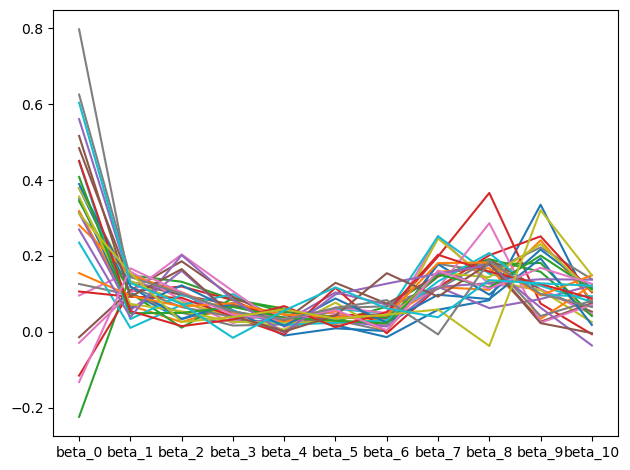

In [35]:
# plot betas to visualize
for i, val in q3_df.iterrows():
    plt.plot(val[2:13])
    plt.tight_layout();

In [36]:
# format output
pd.concat([q3_df.iloc[0:15,:2].reset_index(), q3_df.iloc[15:,:2].reset_index()], axis = 1, join = 'inner').drop(columns = ['index'])

,movie (y),rmse,movie (y),rmse
0,Gone in Sixty Seconds (2000),0.360721,Men in Black (1997),0.515091
1,Crossroads (2002),0.279269,Men in Black II (2002),0.499842
2,Austin Powers: The Spy Who Shagged Me (1999),0.574932,The Green Mile (1999),0.276055
3,Austin Powers in Goldmember (2002),0.576380,The Rock (1996),0.373608
4,Goodfellas (1990),0.389798,You're Next (2011),0.404238
5,The Big Lebowski (1998),0.328329,The Poseidon Adventure (1972),0.317833
6,Twister (1996),0.316942,The Good the Bad and the Ugly (1966),0.374558
7,Blues Brothers 2000 (1998),0.369800,Let the Right One In (2008),0.332147
8,Dances with Wolves (1990),0.358929,Equilibrium (2002),0.274090
9,28 Days Later (2002),0.296506,The Mummy (1999),0.499884


Ridge regression models with a relatively high alpha produced small betas that are close to 0.

### 5) Lasso Regression
I used the same 30 targets movies and 10 predictor movies. After doing an 80/20 train/test split of the columns, I built lasso regression models using the training data. Next, I used grid searches to find the best alpha by minimizing RMSE, then trained the model using the optimal alpha. Finally, I calculated predicted values and RMSE for the 30 movies using the test data.

In [37]:
#np.linspace(0.0001,0.01,20)
np.linspace(0.0042,0.0054,20)

array([0.0042    , 0.00426316, 0.00432632, 0.00438947, 0.00445263,
       0.00451579, 0.00457895, 0.00464211, 0.00470526, 0.00476842,
       0.00483158, 0.00489474, 0.00495789, 0.00502105, 0.00508421,
       0.00514737, 0.00521053, 0.00527368, 0.00533684, 0.0054    ])

In [38]:
# Hyperparameter Tuning 
#alphas = np.array([0.0001,0.001,0.01,0.1,1,10,100,1000,10000])
#alphas = np.linspace(0.0001,0.01,20)
#alphas = np.linspace(0.0042,0.0054,20)
alphas = np.linspace(0.0045,0.0047,10)
lasso = Lasso()
ls_grid = GridSearchCV(estimator = lasso, param_grid = {'alpha': alphas}, scoring='neg_root_mean_squared_error')
ls_grid.fit(x_train, y_train)
ls_grid.best_params_

{'alpha': 0.004611111111111111}

In [39]:
# Lasso regression
lasso = Lasso(alpha = 0.0046).fit(x_train, y_train)
# record betas, intercepts and y_hats
betas_ls = lasso.coef_
intercept_ls = lasso.intercept_
y_pred_ls = lasso.predict(x_test)

In [40]:
# initiate holder for mse
mse_ls = np.empty(30)
# caculate mse for each movie
for i in range(30):
    mse_ls[i] = mean_squared_error(y_test.values[:,i], y_pred_ls[:,i])
# convert mse to rmse  
rmse_ls = np.sqrt(mse_ls)

# create seperate df for each 
rmse_ls_df = pd.DataFrame(rmse_ls)
rmse_ls_df.columns = ['rmse']
betas_ls_df = pd.DataFrame(betas_ls)
betas_ls_df.columns = ['beta_'+str(x+1) for x in range(10)]
intercept_ls_df = pd.DataFrame(intercept_ls)
intercept_ls_df.columns = ['beta_0']

In [165]:
q4_df = pd.concat([middle_30, rmse_ls_df, intercept_ls_df, betas_ls_df], axis = 1)
q4_df

,movie (y),rmse,beta_0,beta_1,beta_2,beta_3,beta_4,beta_5,beta_6,beta_7,beta_8,beta_9,beta_10
0,Gone in Sixty Seconds (2000),0.375520,0.386303,0.094680,0.024263,0.067750,0.035585,0.008501,-0.002194,0.000000,0.058891,0.470377,0.044882
1,Crossroads (2002),0.285161,0.330647,0.052434,0.014966,0.060352,0.038038,0.012877,0.025534,0.118145,0.109200,0.319701,0.070735
2,Austin Powers: The Spy Who Shagged Me (1999),0.577101,-0.236463,0.154931,0.136701,0.077976,0.052376,0.013442,0.056766,0.157548,0.220572,0.210869,0.009172
3,Austin Powers in Goldmember (2002),0.573582,-0.162235,0.095061,0.112593,0.063707,0.008772,0.022639,0.025048,0.193232,0.562659,0.011763,-0.000000
4,Goodfellas (1990),0.387594,0.564663,0.140984,0.103719,0.022157,0.019289,0.104225,0.069812,0.153568,0.026893,0.078700,0.132217
5,The Big Lebowski (1998),0.328433,0.486139,0.135027,0.095682,0.063811,0.014979,0.026189,0.023077,0.159498,0.259922,0.104518,0.028553
6,Twister (1996),0.320585,0.064938,0.165479,0.076878,0.004861,0.050946,0.039466,0.001579,0.405640,0.096181,0.093488,0.014101
7,Blues Brothers 2000 (1998),0.374034,0.096554,0.081884,0.037130,0.000000,0.008127,0.019535,-0.000000,0.216480,0.169265,0.267978,0.136529
8,Dances with Wolves (1990),0.357982,0.338570,0.133153,0.066507,0.023227,0.000000,0.071081,-0.000000,0.384229,0.107922,0.087082,0.000000
9,28 Days Later (2002),0.295558,0.201841,0.000000,0.060280,0.090100,0.018430,0.053185,0.034959,0.388016,0.143476,0.105191,0.055360


In [176]:
(q4_df.iloc[:,3:] == 0).sum().mean()

3.1

In [42]:
q4_df.describe()

,rmse,beta_0,beta_1,beta_2,beta_3,beta_4,beta_5,beta_6,beta_7,beta_8,beta_9,beta_10
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.380843,0.282206,0.094677,0.087425,0.045308,0.022068,0.044730,0.033139,0.161746,0.189001,0.153515,0.070506
std,0.088732,0.248931,0.052035,0.061916,0.028784,0.019586,0.036379,0.038273,0.109133,0.118412,0.129845,0.053618
min,0.234735,-0.236463,0.000000,0.000000,-0.001751,-0.003588,0.000000,-0.002194,0.000000,-0.000000,0.000000,-0.018134
25%,0.323916,0.105910,0.052513,0.042670,0.023596,0.006546,0.019688,0.000395,0.095959,0.108242,0.072442,0.017714
50%,0.374059,0.326509,0.096444,0.079626,0.042715,0.018859,0.030368,0.025291,0.159793,0.173483,0.113973,0.073881
75%,0.400163,0.434802,0.135737,0.110374,0.066765,0.037425,0.054041,0.050869,0.199659,0.253883,0.251198,0.119798
max,0.577101,0.805044,0.177769,0.220507,0.100430,0.064980,0.127218,0.159308,0.405640,0.562659,0.470377,0.158521


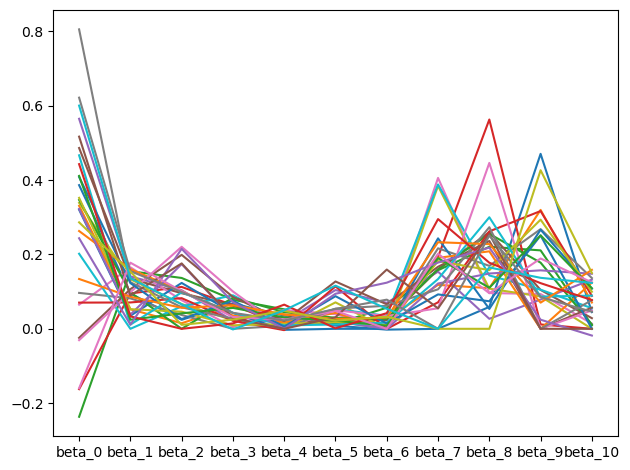

In [43]:
# plot betas to visualize
for i, val in q4_df.iterrows():
    plt.plot(val[2:13])
    plt.tight_layout();

In [44]:
# format output
pd.concat([q4_df.iloc[0:15,:2].reset_index(), q4_df.iloc[15:,:2].reset_index()], axis = 1, join = 'inner').drop(columns = ['index'])

,movie (y),rmse,movie (y),rmse
0,Gone in Sixty Seconds (2000),0.375520,Men in Black (1997),0.515633
1,Crossroads (2002),0.285161,Men in Black II (2002),0.502678
2,Austin Powers: The Spy Who Shagged Me (1999),0.577101,The Green Mile (1999),0.273592
3,Austin Powers in Goldmember (2002),0.573582,The Rock (1996),0.376298
4,Goodfellas (1990),0.387594,You're Next (2011),0.402552
5,The Big Lebowski (1998),0.328433,The Poseidon Adventure (1972),0.322410
6,Twister (1996),0.320585,The Good the Bad and the Ugly (1966),0.374084
7,Blues Brothers 2000 (1998),0.374034,Let the Right One In (2008),0.338731
8,Dances with Wolves (1990),0.357982,Equilibrium (2002),0.275201
9,28 Days Later (2002),0.295558,The Mummy (1999),0.497415


The lasso regression model not only produced small betas that are close to 0 but also forced some betas to be 0.

### 6) Logistic Regression
I calculated average movie ratings per user to be used as my predictor and selected 4 middle-ranked movies as my targets. Then, I transformed the movie ratings into a binary value (1 for ratings above median, 0 for ratings below median) for each of the 4 movies. Next, I split the data into 80% train and 20% test in a stratified way and built a logistic regression model for each movie. Finally, I calculated AUC value for each model using the test set and stored the AUC value, coefficients, and intercept.

In [142]:
r_mean

0       2.742857
1       2.727273
2       3.314815
3       2.414634
4       2.266949
          ...   
1092    3.200000
1093    3.673669
1094    3.132530
1095    3.390625
1096    2.873874
Length: 1097, dtype: float64

In [45]:
# contrusct x
x_5 = r_mean.dropna()
x_5

0       2.742857
1       2.727273
2       3.314815
3       2.414634
4       2.266949
          ...   
1092    3.200000
1093    3.673669
1094    3.132530
1095    3.390625
1096    2.873874
Length: 1096, dtype: float64

In [46]:
# get the middle 4 films
m_5 = pd.DataFrame(c_mean.sort_values()).reset_index()
m_5.columns = ['movie', 'avg']
m_5 = m_5.iloc[198:202,:]
m_5

,movie,avg
198,Fahrenheit 9/11 (2004),2.578014
199,Happy Gilmore (1996),2.581169
200,Diamonds are Forever (1971),2.582677
201,Scream (1996),2.584270


In [47]:
# construct y df
y_5 = movies.loc[:, m_5['movie']].drop(index = [896])
y_5

,Fahrenheit 9/11 (2004),Happy Gilmore (1996),Diamonds are Forever (1971),Scream (1996)
0,2.660436,3.500000,2.662767,2.663563
1,2.652643,2.654221,2.654975,2.655771
2,2.946414,2.947992,2.948746,2.949542
3,2.496324,2.497901,2.498656,2.499452
4,2.422482,1.000000,2.424813,2.425609
...,...,...,...,...
1092,2.889007,2.890584,2.891339,2.892135
1093,3.500000,3.500000,3.500000,3.500000
1094,2.855272,2.856849,2.857604,2.858400
1095,2.984320,2.985897,2.986651,2.987447


In [48]:
# function that will do the median split and convert ratings to 0s and 1s
def compute_y(x):
    m = x.median()
    return np.where(x>m, 1, 0)

# apply the fucntion to each of the 4 movies
y_5 = y_5.transform(compute_y)
y_5

,Fahrenheit 9/11 (2004),Happy Gilmore (1996),Diamonds are Forever (1971),Scream (1996)
0,0,1,0,0
1,0,0,0,0
2,1,1,1,1
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1092,1,1,1,1
1093,1,1,1,1
1094,1,1,1,1
1095,1,1,1,1


In [49]:
# construct y for each movie
y1 = y_5.iloc[:,0]
y2 = y_5.iloc[:,1]
y3 = y_5.iloc[:,2]
y4 = y_5.iloc[:,3]

In [50]:
# build logistic regression model - Fahrenheit 9/11 (2004)
# train test split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_5, y1, test_size=0.2, random_state=1001, stratify = y1)

# build logistic regression model
log_reg1 = LogisticRegression().fit(x_train1.values.reshape(-1,1), y_train1)
betas1 = log_reg1.coef_
intercept1 = log_reg1.intercept_

# predict outcome & probabilities
y_pred1 = log_reg1.predict(x_test1.values.reshape(-1,1))
y_pred_prob1 = log_reg1.predict_proba(x_test1.values.reshape(-1,1))[:, 1]

# roc 
fpr1, tpr1, thre1 = roc_curve(y_test1, y_pred_prob1)

# auc
auc1 = roc_auc_score(y_test1, y_pred_prob1)
auc1

0.9651239669421487

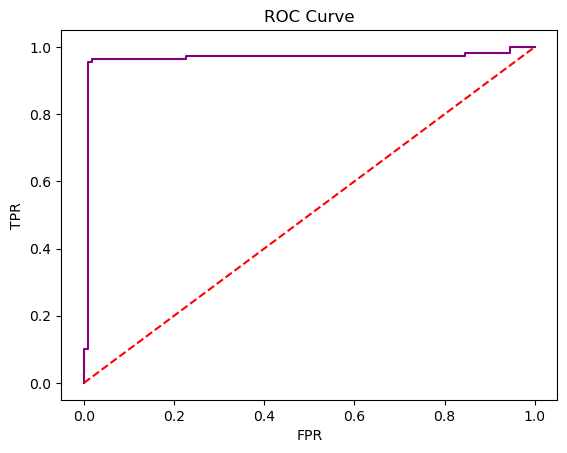

In [51]:
# plot roc curve - Fahrenheit 9/11 (2004)
plt.plot(fpr1, tpr1, color="purple")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

In [52]:
# confusion matrix and reports - Fahrenheit 9/11 (2004)
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

[[104   6]
 [  4 106]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       110
           1       0.95      0.96      0.95       110

    accuracy                           0.95       220
   macro avg       0.95      0.95      0.95       220
weighted avg       0.95      0.95      0.95       220



In [53]:
# build logistic regression model - Happy Gilmore (1996)
# train test split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_5, y2, test_size=0.2, random_state=1001, stratify = y2)

# build logistic regression model
log_reg2 = LogisticRegression().fit(x_train2.values.reshape(-1,1), y_train2)
betas2 = log_reg2.coef_
intercept2 = log_reg2.intercept_

# predict outcome & probabilities
y_pred2 = log_reg2.predict(x_test2.values.reshape(-1,1))
y_pred_prob2 = log_reg2.predict_proba(x_test2.values.reshape(-1,1))[:, 1]

# roc 
fpr2, tpr2, thre2 = roc_curve(y_test2, y_pred_prob2)

# auc
auc2 = roc_auc_score(y_test2, y_pred_prob2)
auc2

0.9084297520661156

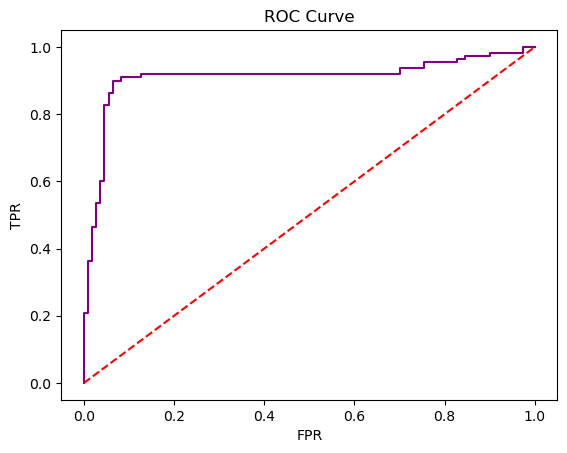

In [54]:
# plot roc curve - Happy Gilmore (1996)
plt.plot(fpr2, tpr2, color="purple")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

In [55]:
# confusion matrix and reports - Happy Gilmore (1996)
print(confusion_matrix(y_test2, y_pred2))
print(classification_report(y_test2, y_pred2))

[[ 94  16]
 [  9 101]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       110
           1       0.86      0.92      0.89       110

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



In [56]:
# build logistic regression model - Diamonds are Forever (1971)
# train test split
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_5, y3, test_size=0.2, random_state=1001, stratify = y3)

# build logistic regression model
log_reg3 = LogisticRegression().fit(x_train3.values.reshape(-1,1), y_train3)
betas3 = log_reg3.coef_
intercept3 = log_reg3.intercept_

# predict outcome & probabilities
y_pred3 = log_reg3.predict(x_test3.values.reshape(-1,1))
y_pred_prob3 = log_reg3.predict_proba(x_test3.values.reshape(-1,1))[:, 1]

# roc 
fpr3, tpr3, thre3 = roc_curve(y_test3, y_pred_prob3)

# auc
auc3 = roc_auc_score(y_test3, y_pred_prob3)
auc3

0.9678512396694214

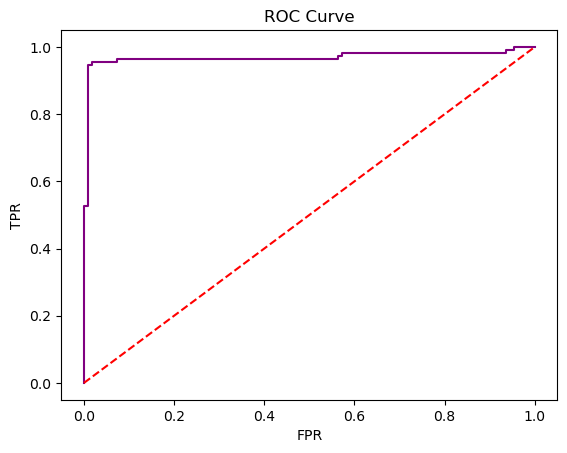

In [57]:
# plot roc curve - Diamonds are Forever (1971)
plt.plot(fpr3, tpr3, color="purple")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

In [58]:
# confusion matrix and reports - Diamonds are Forever (1971)
print(confusion_matrix(y_test3, y_pred3))
print(classification_report(y_test3, y_pred3))

[[106   4]
 [  5 105]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       110
           1       0.96      0.95      0.96       110

    accuracy                           0.96       220
   macro avg       0.96      0.96      0.96       220
weighted avg       0.96      0.96      0.96       220



In [59]:
# build logistic regression model - Scream (1996)
# train test split
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_5, y4, test_size=0.2, random_state=1001, stratify = y4)

# build logistic regression model
log_reg4 = LogisticRegression().fit(x_train4.values.reshape(-1,1), y_train4)
betas4 = log_reg4.coef_
intercept4 = log_reg4.intercept_

# predict outcome & probabilities
y_pred4 = log_reg4.predict(x_test4.values.reshape(-1,1))
y_pred_prob4 = log_reg4.predict_proba(x_test4.values.reshape(-1,1))[:, 1]

# roc 
fpr4, tpr4, thre4 = roc_curve(y_test4, y_pred_prob4)

# auc
auc4 = roc_auc_score(y_test4, y_pred_prob4)
auc4

0.901487603305785

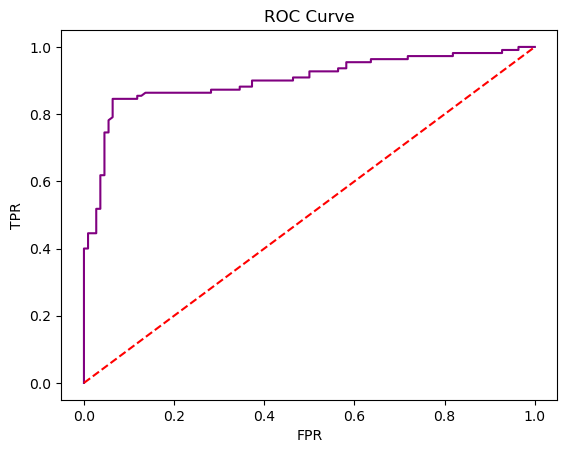

In [60]:
# plot roc curve - Scream (1996)
plt.plot(fpr4, tpr4, color="purple")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

In [61]:
# confusion matrix and reports - Scream (1996)
print(confusion_matrix(y_test4, y_pred4))
print(classification_report(y_test4, y_pred4))

[[94 16]
 [15 95]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       110
           1       0.86      0.86      0.86       110

    accuracy                           0.86       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.86      0.86      0.86       220



In [62]:
# format performances and outputs of each model
m_5['auc'] = [auc1, auc2, auc3, auc4]
m_5['beta_0'] = [intercept1[0], intercept2[0], intercept3[0], intercept4[0]]
m_5['beta_1'] = [betas1[0][0], betas2[0][0], betas3[0][0], betas4[0][0]]
df_q5 = m_5.reset_index().drop(columns = ['index','avg'])

In [63]:
df_q5

,movie,auc,beta_0,beta_1
0,Fahrenheit 9/11 (2004),0.965124,-21.346202,7.122810
1,Happy Gilmore (1996),0.908430,-15.441357,5.162669
2,Diamonds are Forever (1971),0.967851,-21.205557,7.068991
3,Scream (1996),0.901488,-12.744025,4.260540


In [ ]:
# combined ROC curves 
f'Logistic Regression - Initial (area = {metrics.iloc[0,1]:.2f})'

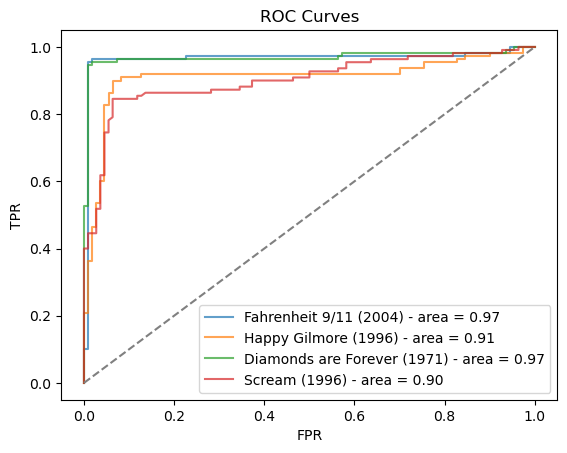

In [158]:
plt.plot(fpr1, tpr1, alpha = 0.7, label = f'Fahrenheit 9/11 (2004) - area = {df_q5.iloc[0,1]:.2f}')
plt.plot(fpr2, tpr2, alpha = 0.7, label = f'Happy Gilmore (1996) - area = {df_q5.iloc[1,1]:.2f}')
plt.plot(fpr3, tpr3, alpha = 0.7, label = f'Diamonds are Forever (1971) - area = {df_q5.iloc[2,1]:.2f}')
plt.plot(fpr4, tpr4, alpha = 0.7, label = f'Scream (1996) - area = {df_q5.iloc[3,1]:.2f}')
plt.plot([0,1], [0,1], '--', color = 'gray')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curves")
plt.legend()
plt.show()

The models for ‘Fahrenheit 9/11 (2004)’ and ‘Diamonds are Forever (1971)’ performs really well as both
achieved around 97% AUC values and have ROC curves really close to the top left corner. The model for
‘Happy Gilmore (1996)’ performs less well with a 0.91 AUC value and has a ROC curve a little further
from the top left corner. The model for ‘Scream (1996)’ has the lowest AUC value of 0.9 and has a ROC
curve that is furthest from the top left corner among the 4 models. All 4 models performed relatively well
as their AUC scores are all close to 1 and their ROC curves are all close to the top left corner.

### 7) Random Forest
For this part, the non-moving rating survey response columns after dropping missing values and outliers are used. I separated the gender column as the target (transformed so female is 1 and everything else is 0), and used the other columns as predictors. Next, I split the data into 80% train and 20% test in a stratified way and trained a tuned random forest classifier to predict female viewers using optimal hyperparameters from a grid search. Finally, I calculated the model's AUC value on the test set and extracted feature importances.

In [206]:
movies_all

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [208]:
# check for nas in the gender column
movies_all['Gender identity (1 = female; 2 = male; 3 = self-described)'].isna().sum()

24

In [209]:
# subset the survey questions response columns
df_gender = movies_all.iloc[:,400:]
df_gender = df_gender.dropna(axis = 0)

df_gender.shape

(946, 77)

In [236]:
# check for outliers
df_gender.iloc[:,-3:].describe()

,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
count,631.000000,631.000000,631.000000
mean,0.694136,0.152139,0.575277
std,0.461138,0.376691,0.494693
min,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [211]:
# check for outliers
df_gender.min().describe()

count    77.000000
mean      0.948052
std       0.320202
min      -1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
dtype: float64

In [212]:
# check for outliers
df_gender.max().describe()

count    77.000000
mean      4.922078
std       0.823443
min       1.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       6.000000
dtype: float64

In [214]:
# drop outliers
df_gender = df_gender[df_gender<=5].dropna(axis = 0)
df_gender.shape

(631, 77)

In [216]:
# construct target variable
y_gender = df_gender['Gender identity (1 = female; 2 = male; 3 = self-described)']
# set female to 1, other genders to 0
y_gender[y_gender != 1] = 0
y_gender.unique()

C:\Users\liuq34\AppData\Local\Temp\ipykernel_27460\958270836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_gender[y_gender != 1] = 0


array([1., 0.])

In [217]:
# check the shape of y
y_gender.shape

(631,)

In [218]:
y_gender.value_counts()

1.0    438
0.0    193
Name: Gender identity (1 = female; 2 = male; 3 = self-described), dtype: int64

In [219]:
# construct features and check the its shape
x_gender = df_gender.drop(columns = ['Gender identity (1 = female; 2 = male; 3 = self-described)'])
x_gender.shape

(631, 76)

In [220]:
# for each feature build a logistic regression to predict if gender is female or not
auc_scores = []

for var, val in x_gender.iteritems():
    
    x_tr, x_te, y_tr, y_te = train_test_split(val, y_gender, test_size=0.2, random_state=1001, stratify = y_gender)
    
    log_reg = LogisticRegression().fit(x_tr.values.reshape(-1,1), y_tr)
    
    y_pr_prob = log_reg.predict_proba(x_te.values.reshape(-1,1))[:, 1]
    auc = roc_auc_score(y_te, y_pr_prob)
    
    auc_scores.append(auc)

In [221]:
ec_gender = pd.DataFrame(zip(list(x_gender.columns),auc_scores), columns = ['question', 'auc'])
ec_gender.sort_values(by = 'auc', ascending = False)

,question,auc
64,I have cried during a movie,0.718386
72,Movies change my position on social economic o...,0.657051
67,When watching a movie I cheer or shout or talk...,0.648164
70,"The emotions on the screen ""rub off"" on me - f...",0.629516
38,Worries a lot,0.615385
...,...,...
65,I have trouble following the story of a movie,0.437354
50,Is sometimes shy/inhibited,0.435315
69,As a movie unfolds I start to have problems ke...,0.432984
19,Have you ever been sky-diving?,0.421911


In [222]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x_gender, y_gender, test_size=0.2, random_state=1001, stratify = y_gender)

In [223]:
# Random Forest model
rf = RandomForestClassifier(n_estimators = 200, random_state = 1001, max_depth = 5, min_samples_leaf = 0.1)
rf.fit(x_train, y_train)
rf_acc = rf.score(x_test, y_test)
print(f'initial random forest accuracy: {rf_acc:.3f}')

initial random forest accuracy: 0.693


In [224]:
# calculate auc roc
y_pred_proba = rf.predict_proba(x_test)[:, 1]
rf_auc = roc_auc_score(y_test, y_pred_proba)
print(f'initial random forest auc roc: {rf_auc:.3f}')

initial random forest auc roc: 0.752


In [225]:
# look at feature importance
imp = pd.Series(rf.feature_importances_, index = x_gender.columns)
imp.sort_values(ascending = False).head(10)

I have cried during a movie                                                0.138507
When watching movies things get so intense that I have to stop watching    0.107347
Have you gambled or bet for money?                                         0.093693
Is emotionally stable/not easily upset                                     0.072479
Is relaxed/handles stress well                                             0.045833
When watching a movie I cheer or shout or talk or curse at the screen      0.042774
Remains calm in tense situations                                           0.038072
I enjoy going to large music or dance festivals                            0.036953
I enjoy impulse shopping                                                   0.034243
My life is very stressful                                                  0.031886
dtype: float64

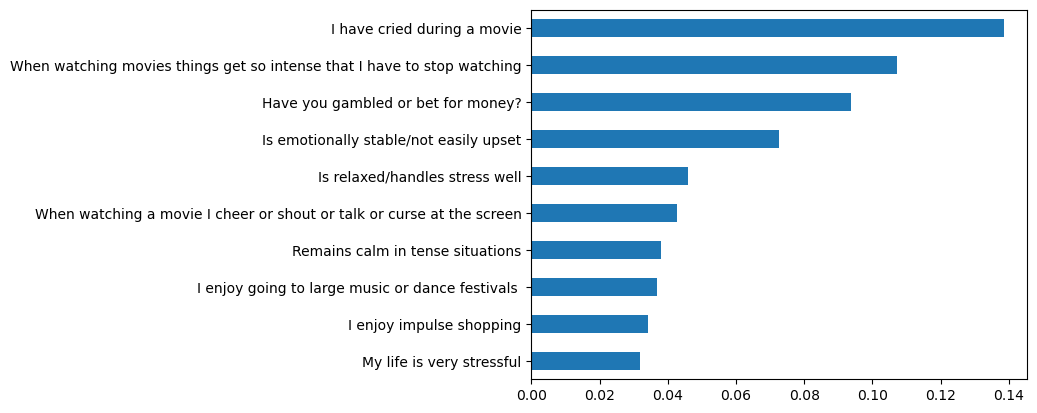

In [226]:
imp.sort_values().tail(10).plot(kind='barh');

In [227]:
# model tuning - grid search
params = {'n_estimators': np.arange(100,501,100),
          'max_depth': np.arange(2,9),
          'min_samples_leaf': np.linspace(0.05,0.2,6),
          'max_features':['log2', 'sqrt']}
params

{'n_estimators': array([100, 200, 300, 400, 500]),
 'max_depth': array([2, 3, 4, 5, 6, 7, 8]),
 'min_samples_leaf': array([0.05, 0.08, 0.11, 0.14, 0.17, 0.2 ]),
 'max_features': ['log2', 'sqrt']}

In [228]:
rf1 = RandomForestClassifier(random_state = 1001)
rf_tun = GridSearchCV(estimator = rf1, param_grid = params, cv = 3, scoring = 'roc_auc', n_jobs = -1)
rf_tun.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1001),
             n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8]),
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([0.05, 0.08, 0.11, 0.14, 0.17, 0.2 ]),
                         'n_estimators': array([100, 200, 300, 400, 500])},
             scoring='roc_auc')

In [229]:
# optimal hyperparameters
rf_tun.best_params_

{'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 0.08000000000000002,
 'n_estimators': 400}

In [230]:
# best roc
rf_tun.best_score_

0.8262180498488815

In [231]:
# test the optimal model - accuracy
tuned_rf = rf_tun.best_estimator_
rf_tun_acc = tuned_rf.score(x_train, y_train)
print(f'tuned random forest accuracy: {rf_tun_acc:.3f}')

tuned random forest accuracy: 0.694


In [232]:
# test the optimal model - roc auc
y_pred_proba_rf1 = tuned_rf.predict_proba(x_test)[:, 1]
rf_tun_auc = roc_auc_score(y_test, y_pred_proba_rf1)
print(f'tuned random forest auc roc: {rf_tun_auc:.3f}')

tuned random forest auc roc: 0.756


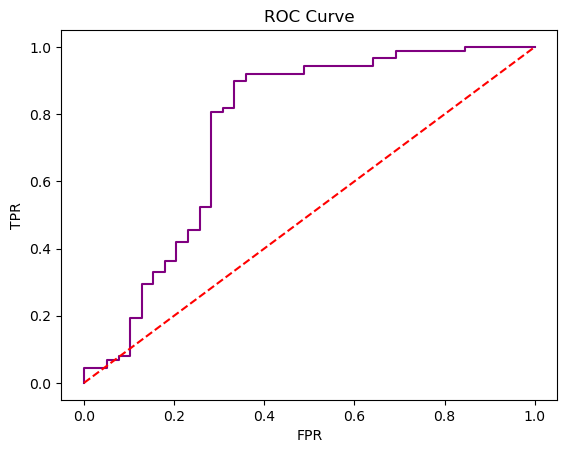

In [233]:
# plot roc curve 

fpr, tpr, thre = roc_curve(y_test, y_pred_proba_rf1)

plt.plot(fpr, tpr, color="purple")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

In [234]:
# look at optimal model feature importance
imp1 = pd.Series(tuned_rf.feature_importances_, index = x_gender.columns)
imp1.sort_values(ascending = False).head(10)

I have cried during a movie                                                0.150429
Have you gambled or bet for money?                                         0.101258
When watching movies things get so intense that I have to stop watching    0.079335
Is emotionally stable/not easily upset                                     0.064250
Is relaxed/handles stress well                                             0.037732
Is curious about many different things                                     0.032144
I enjoy impulse shopping                                                   0.032093
When watching a movie I cheer or shout or talk or curse at the screen      0.031998
I enjoy going to large music or dance festivals                            0.030667
My life is very stressful                                                  0.029856
dtype: float64

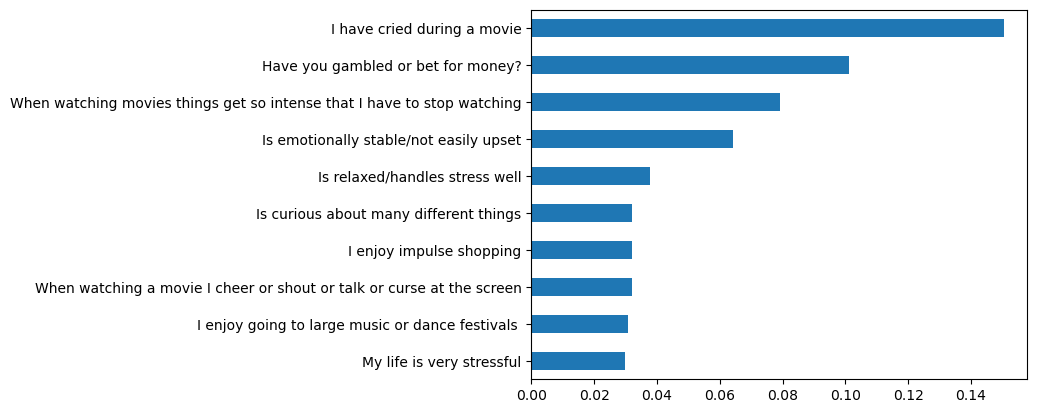

In [235]:
imp1.sort_values().tail(10).plot(kind='barh');

Based on this model, the most important features (question) for predicting whether a viewer is female is “I have cried during a movie” followed by “Have you gambled or bet money” and “When watching movies things get so intense that I have to stop watching”. This shows that crying during a movie, gambling and betting, and stopping watching after seeing intense scenes are the largest factors contributing to the classification of a viewer’s gender.